In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
origin = pd.read_csv('/content/drive/MyDrive/kubig/Timeseries/bike_data.csv')
submission = pd.read_excel('/content/drive/MyDrive/kubig/Timeseries/bike_submission.xlsx')
origin

,대여일시,대여건수
0,2018-01-01,4950
1,2018-01-02,7136
2,2018-01-03,7156
3,2018-01-04,7102
4,2018-01-05,7705
...,...,...
2000,NaN,NaN
2001,NaN,NaN
2002,NaN,NaN
2003,NaN,NaN


In [4]:
sub1 = submission.copy()
sub1

,대여일시,대여건수
0,2023-01-01,NaN
1,2023-01-02,NaN
2,2023-01-03,NaN
3,2023-01-04,NaN
4,2023-01-05,NaN
...,...,...
175,2023-06-25,NaN
176,2023-06-27,NaN
177,2023-06-28,NaN
178,2023-06-29,NaN


In [5]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여일시    180 non-null    datetime64[ns]
 1   대여건수    0 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [6]:
origin= origin.dropna(how = 'all')
origin.tail()

,대여일시,대여건수
1820,2022-12-27,"58,890"
1821,2022-12-28,"54,012"
1822,2022-12-29,"57,393"
1823,2022-12-30,"56,058"
1824,2022-12-31,"42,347"


In [7]:
df = origin.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여일시    1825 non-null   object
 1   대여건수    1825 non-null   object
dtypes: object(2)
memory usage: 42.8+ KB


In [8]:
df.isnull().sum()

대여일시    0
대여건수    0
dtype: int64

In [9]:
df.columns = ['date', 'cnt'] #컬럼명 변경
df['date']=pd.to_datetime(df['date']) # datetime으로 변경
df['cnt'] = df['cnt'].str.replace(',', '').astype(int) #대여건수 데이터 내 반점제거해 수치형 변수로 변환예정.
df['cnt'] = pd.to_numeric(df['cnt']) # 대여건수 데이터타입 object -> int

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1825 non-null   datetime64[ns]
 1   cnt     1825 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 42.8 KB


In [11]:
df_month = df.groupby(df['date'].dt.strftime("%Y-%m")).sum()
df_month
df_daily = df.groupby(df['date'].dt.to_period('D')).sum()
df_daily
df_year = df.groupby(df['date'].dt.strftime('%Y')).sum()
df_month

<ipython-input-11-18e3a9fda6a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df.groupby(df['date'].dt.strftime("%Y-%m")).sum()
<ipython-input-11-18e3a9fda6a1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.groupby(df['date'].dt.to_period('D')).sum()
<ipython-input-11-18e3a9fda6a1>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby(df['date'].dt.strftime('%Y')).sum()


,cnt
date,
2018-01,164367
2018-02,168741
2018-03,462661
2018-04,687885
2018-05,965609
2018-06,1207123
2018-07,1100015
2018-08,1037505
2018-09,1447993


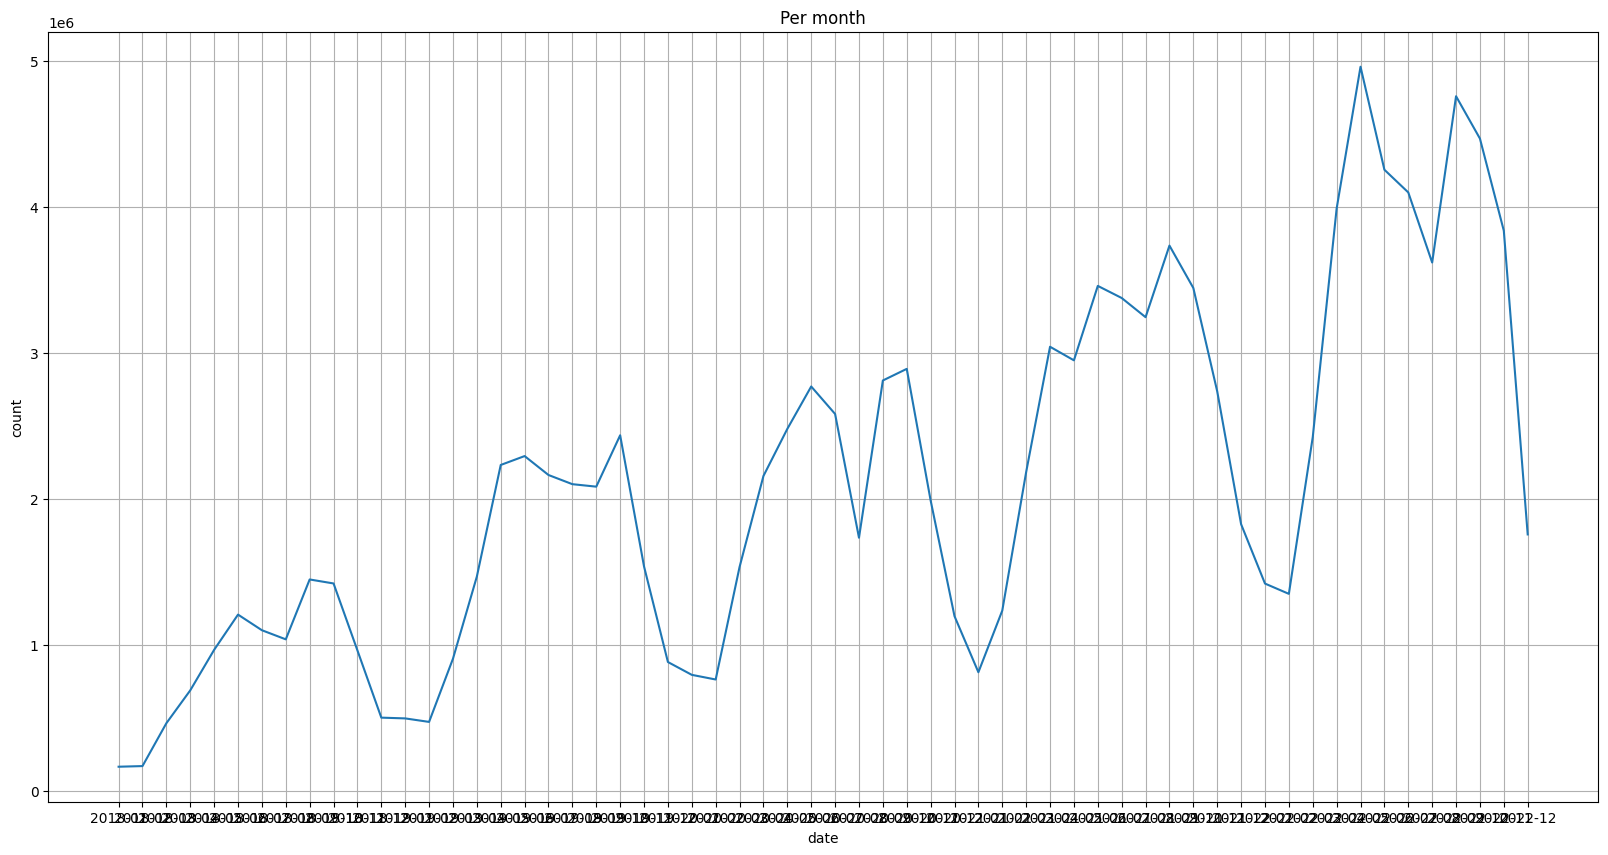

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(df_month.index, df_month['cnt']) # 월별 데이터
plt.title('Per month')
plt.xlabel('date')
plt.ylabel('count')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


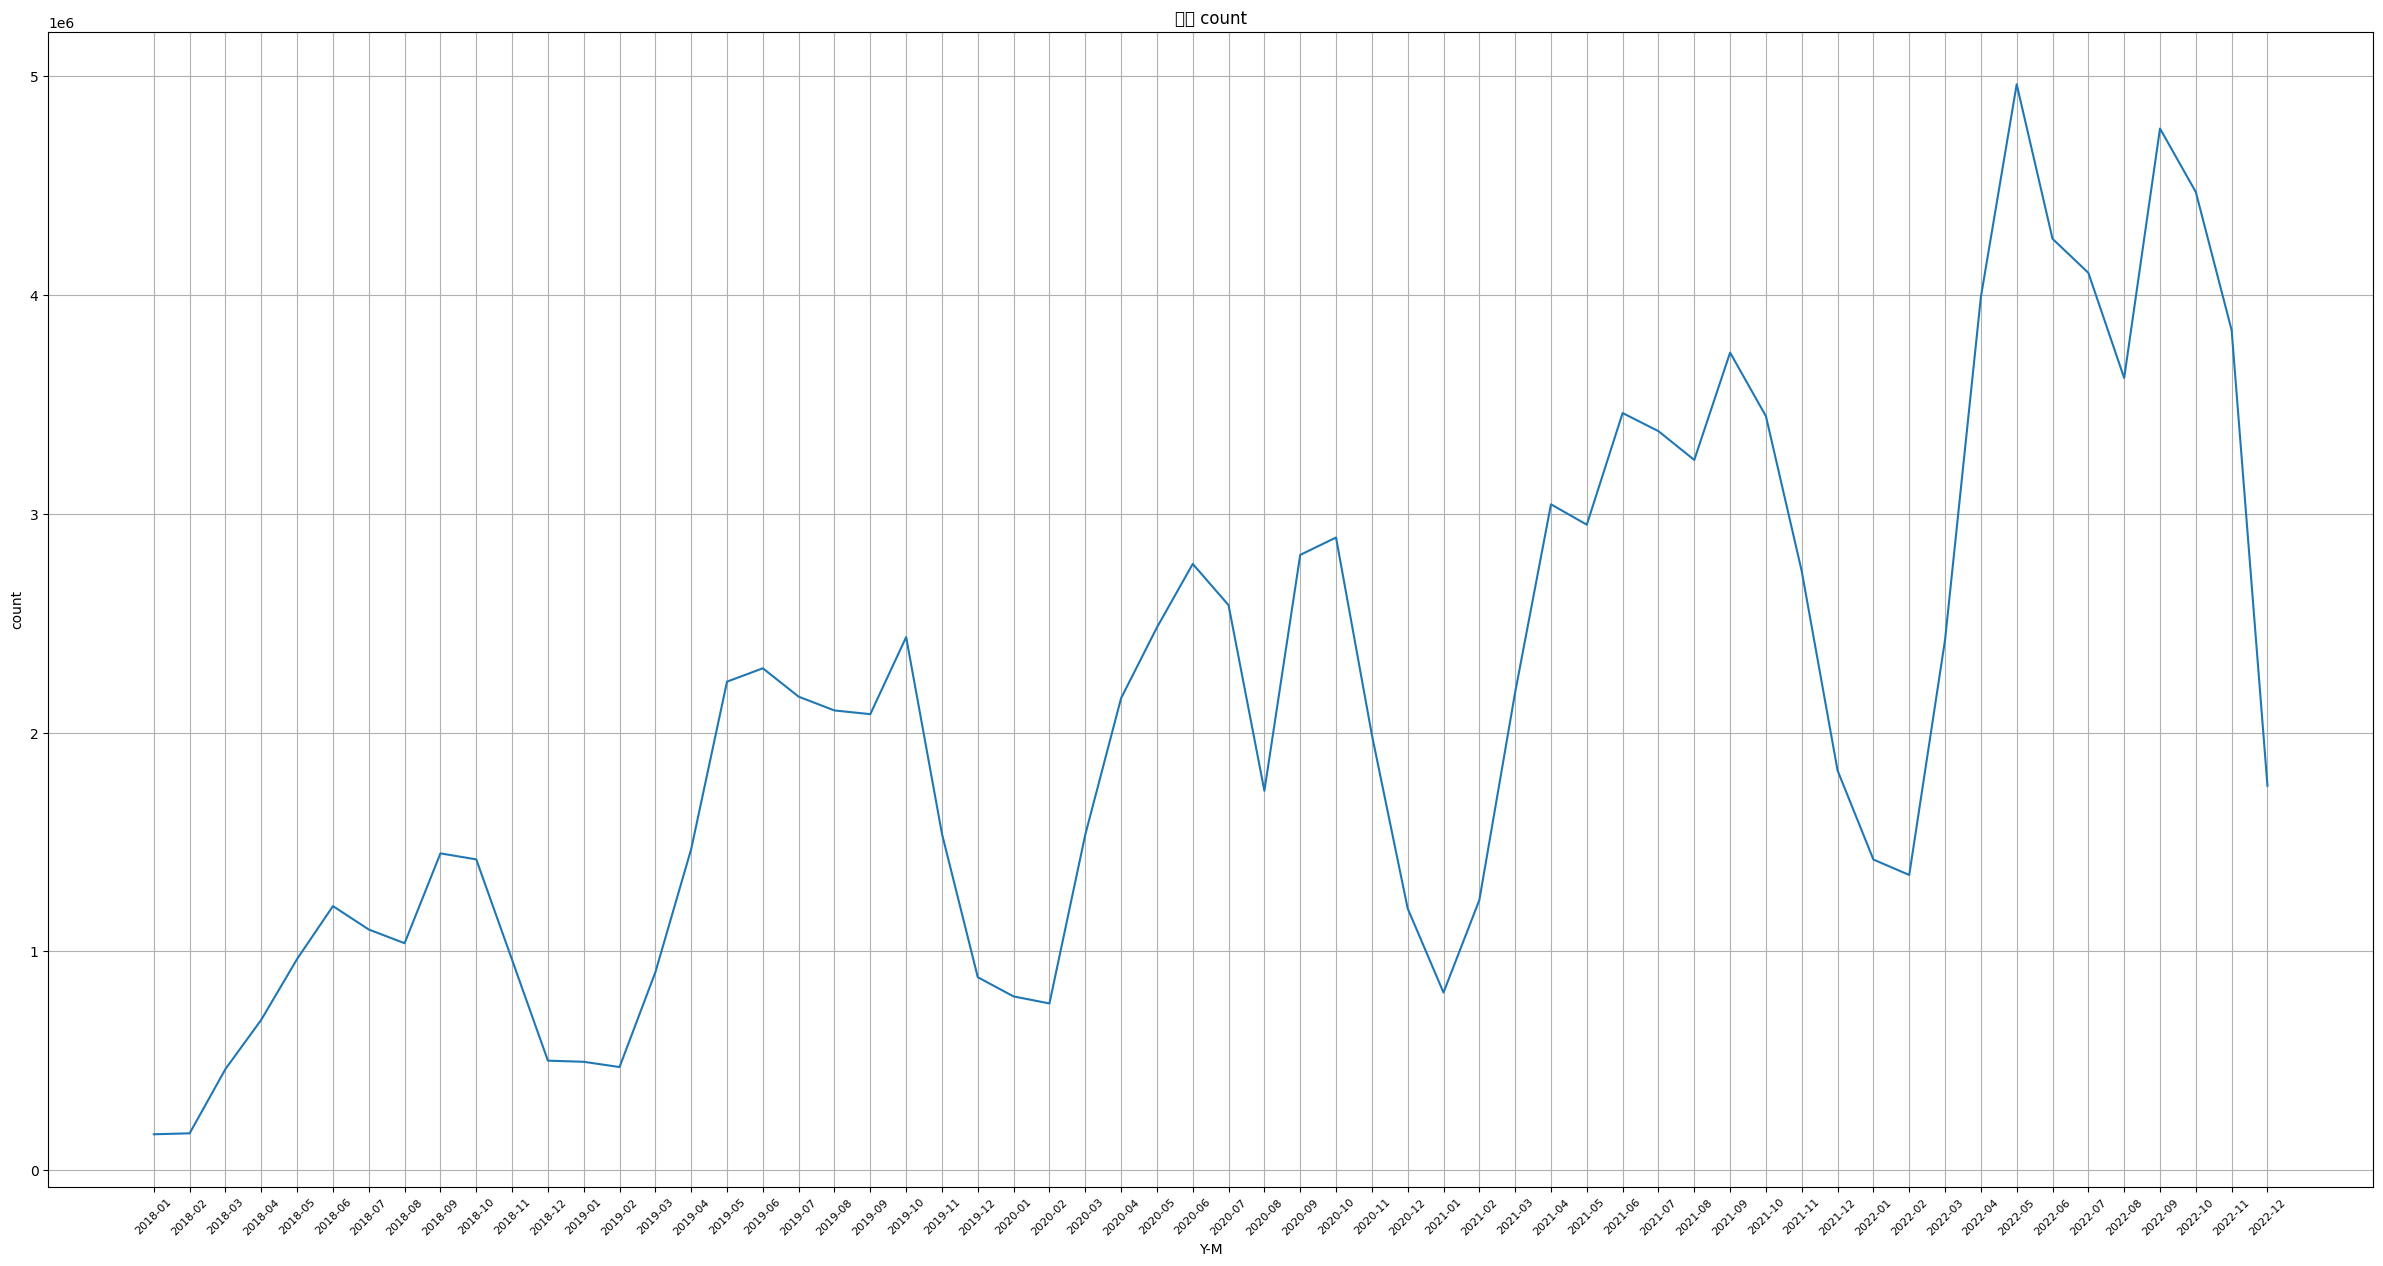

In [13]:
plt.figure(figsize=(30, 15)) # 그래프 사이즈 지정
plt.xticks(size=8, rotation=45) # x축 눈금 라벨 8, 45도 회전.
plt.plot(df_month.index,df_month['cnt'])
plt.title('월별 count')
plt.xlabel('Y-M')
plt.ylabel('count')
plt.grid(True)
plt.show()

# 월별 그래프 특징

* 일정 주기를 갖고 있다고 보임.
* 그 주기를 기준으로 상승과 하락을 반복하지만 상승하는 개형.
* 매년 2월에 다시 오르기 시작하는 주기 1년으로 생각.

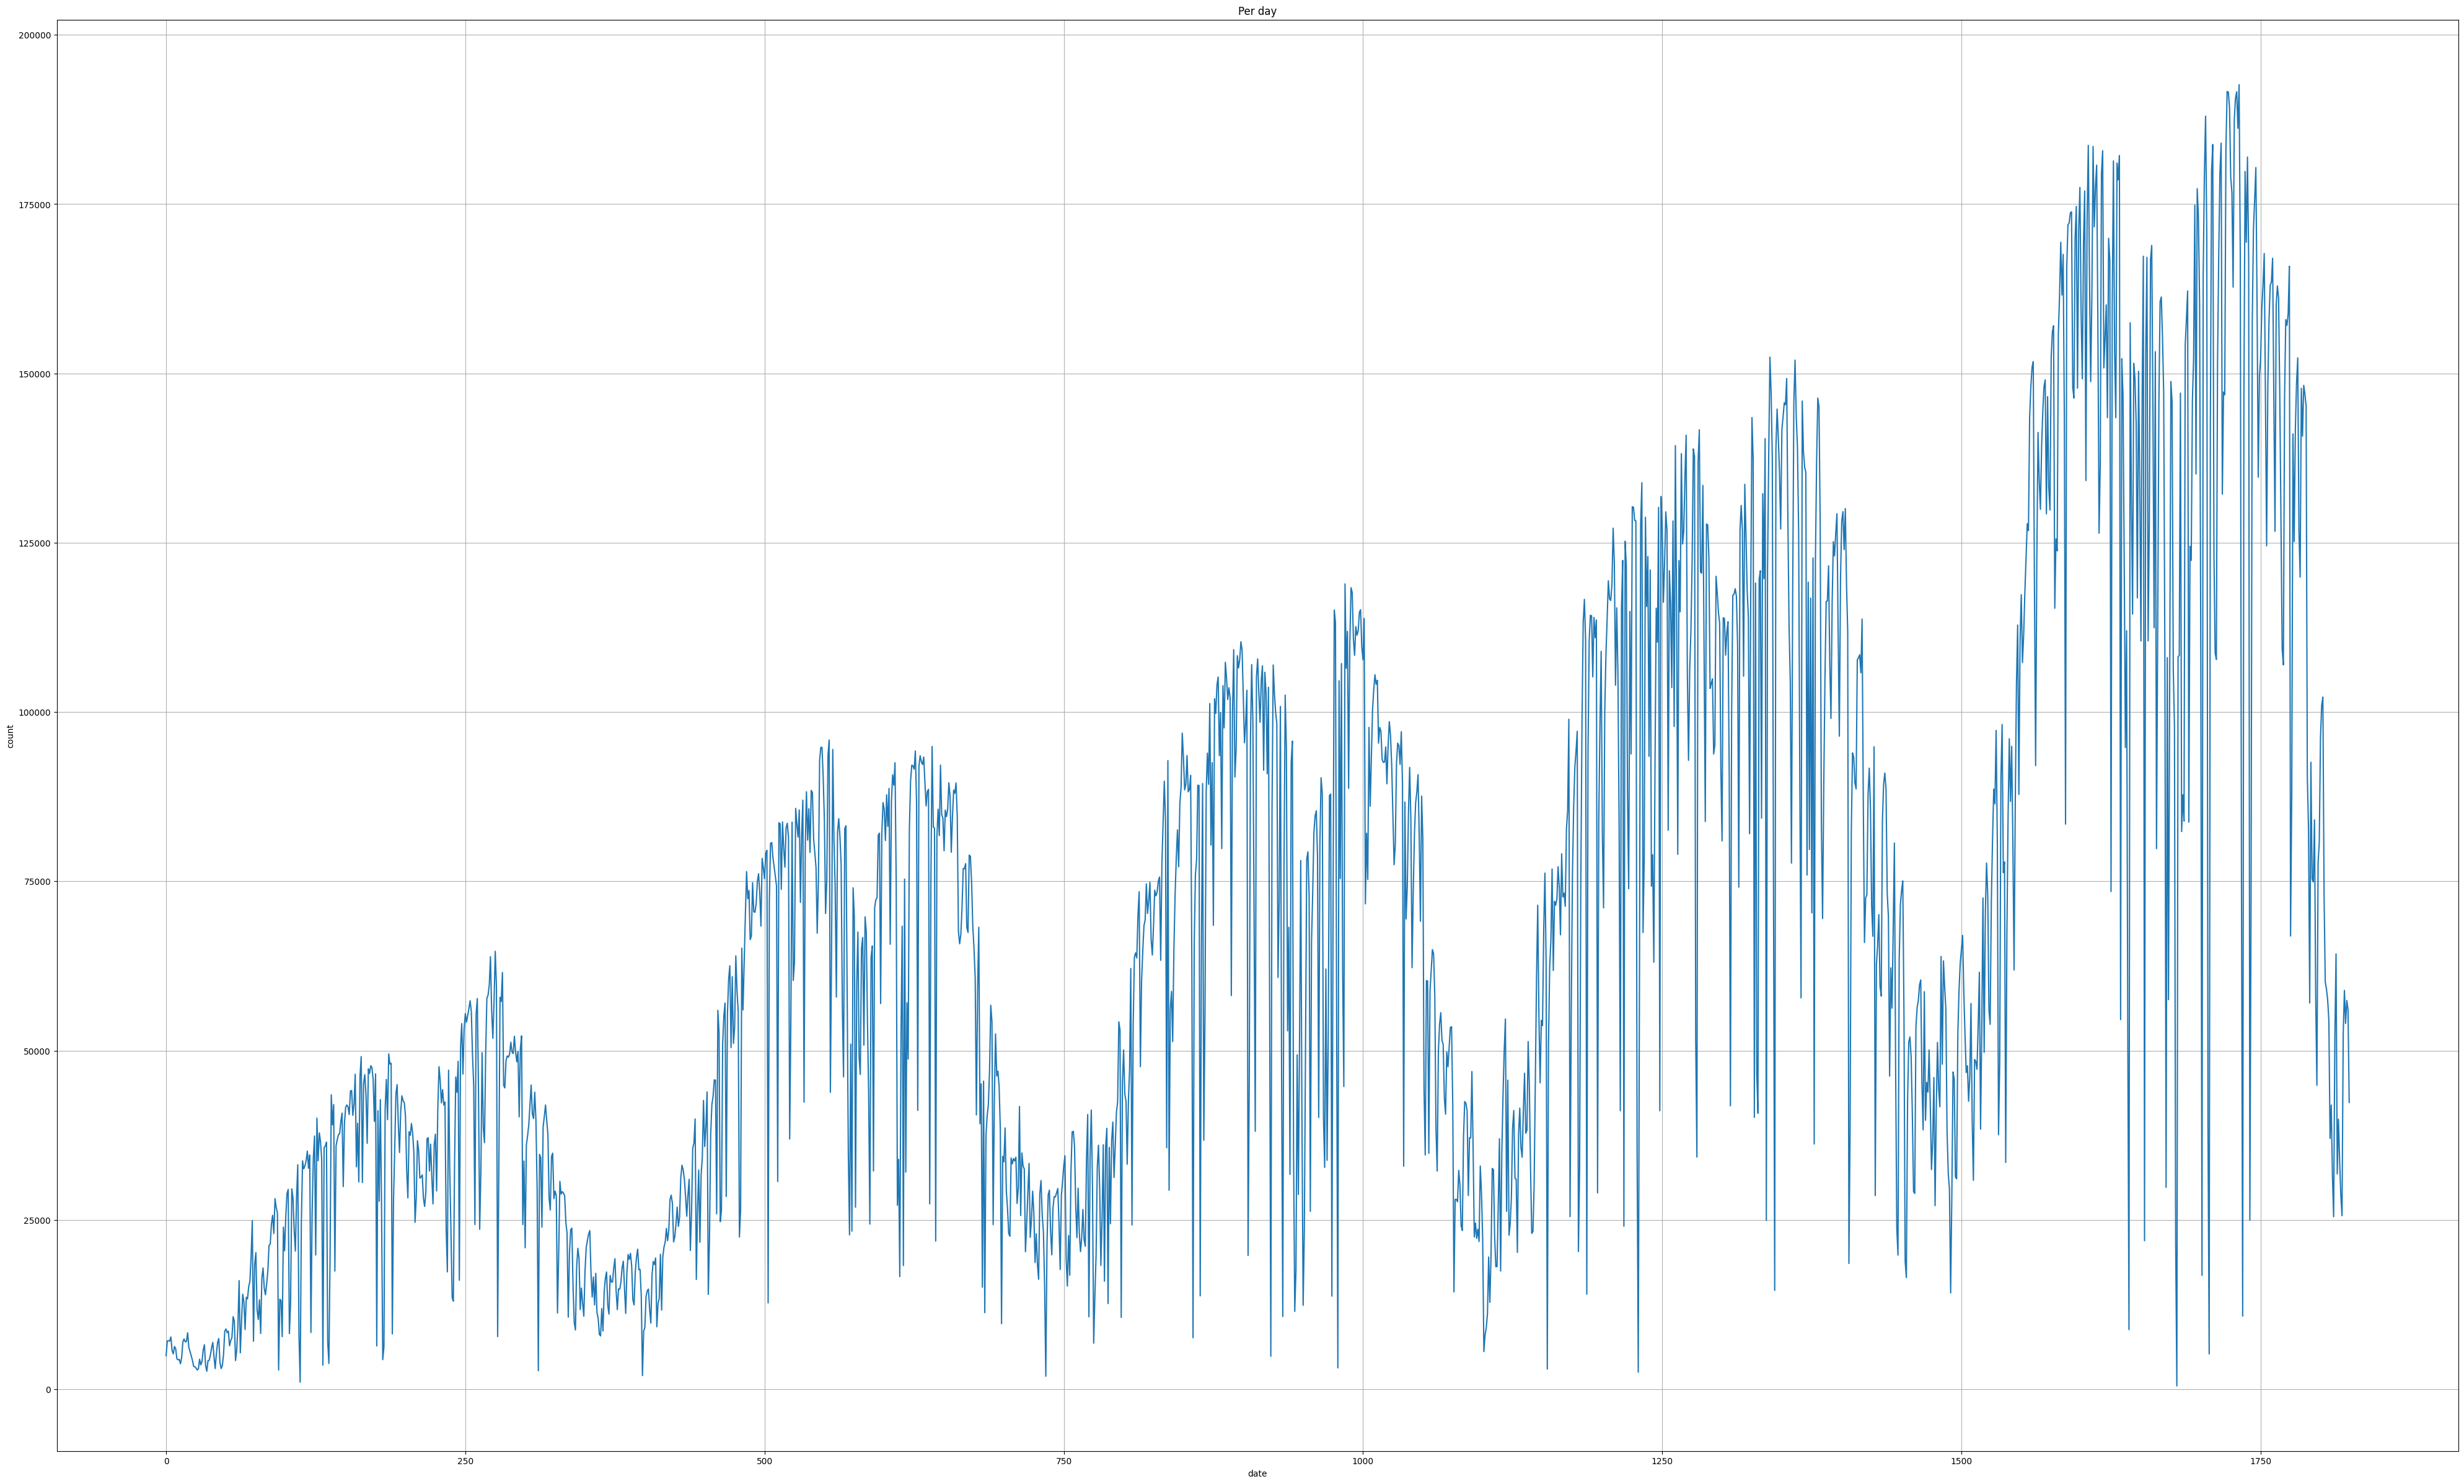

In [14]:
plt.figure(figsize=(50, 30))
plt.plot(df.index, df['cnt']) # 일별 그래프
plt.title('Per day')
plt.xlabel('date')
plt.ylabel('count')
plt.grid(True)
plt.show()

# 일별 그래프 특징

* 일정 주기를 갖고 개형이 변동이 커지는 선에서 비슷.
* 일별로 변동성이 큼.
* 한 개형을 패턴 한개로 봤을 때 증가하는 추세를 보임.


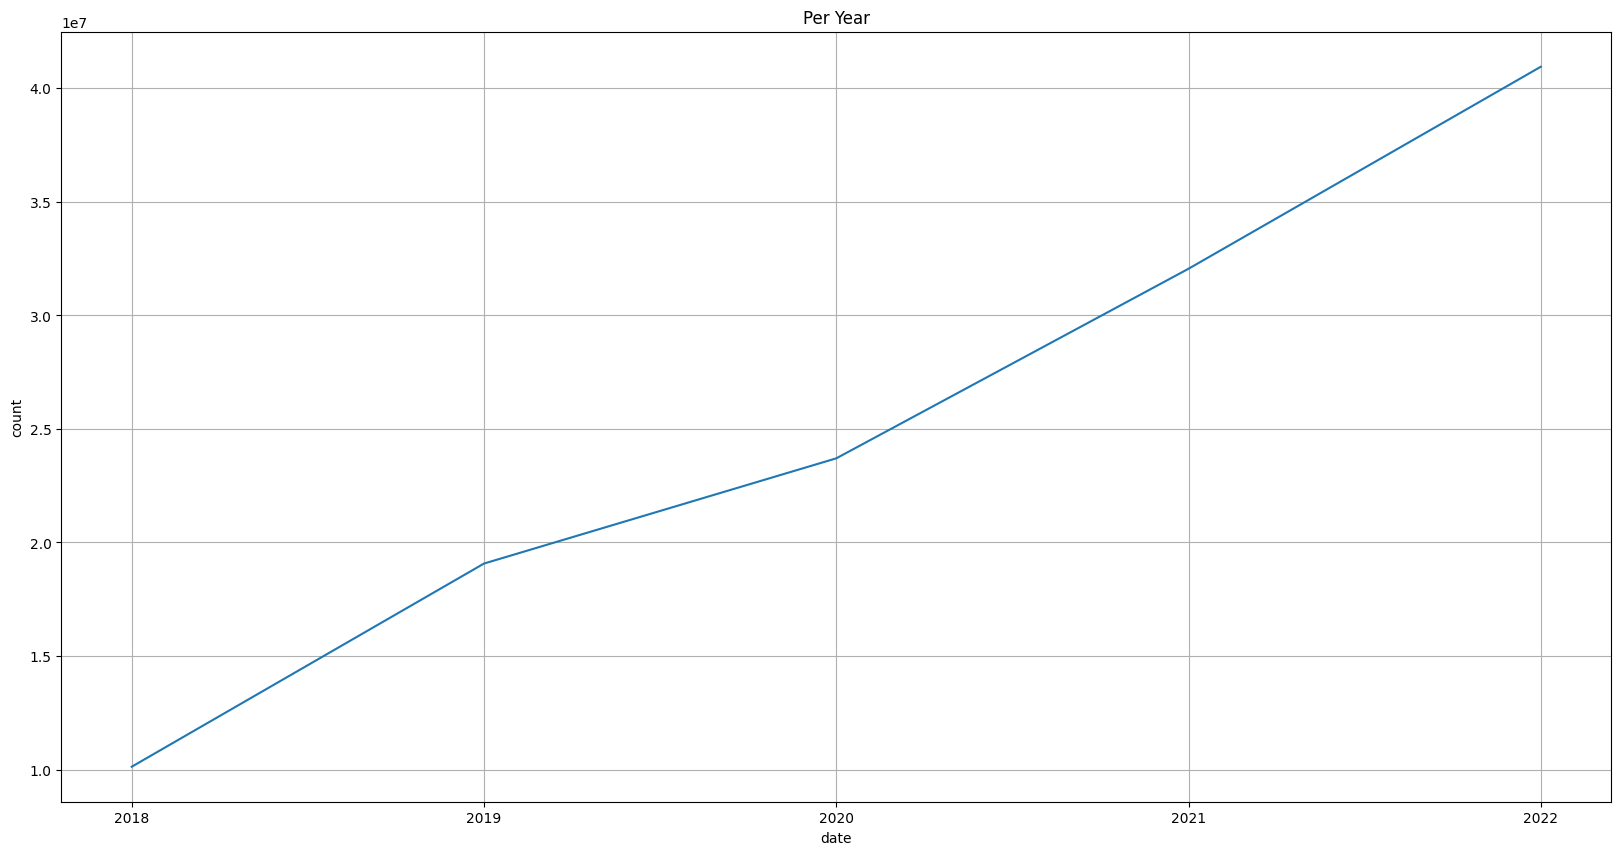

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(df_year.index, df_year['cnt']) # 일별 그래프
plt.title('Per Year')
plt.xlabel('date')
plt.ylabel('count')
plt.grid(True)
plt.show()

# year 별 특징

* 월별 추세에서 짐작을 뒷받침해주듯 증가하는 그래프를 보여줌.
* 2019 -> 2020 기간에 상승폭이 타 시계열에 비해 줄은 것을 볼 수 있음.

# 월별 정상성

* 시각적으로도 상승하는 추세와 계절성이 확인되지만 한번 더 체크.

## ADF test


In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_month['cnt'])
result

# ADF statistic : 0.2403  p-value : 0.9744  Critical values : 5% 하에 -2.923으로 p-value > 0.05 이므로 비정상성.

(0.2403859995321365,
 0.9744379000137139,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 1373.9189167987058)

## ACF & PACF test

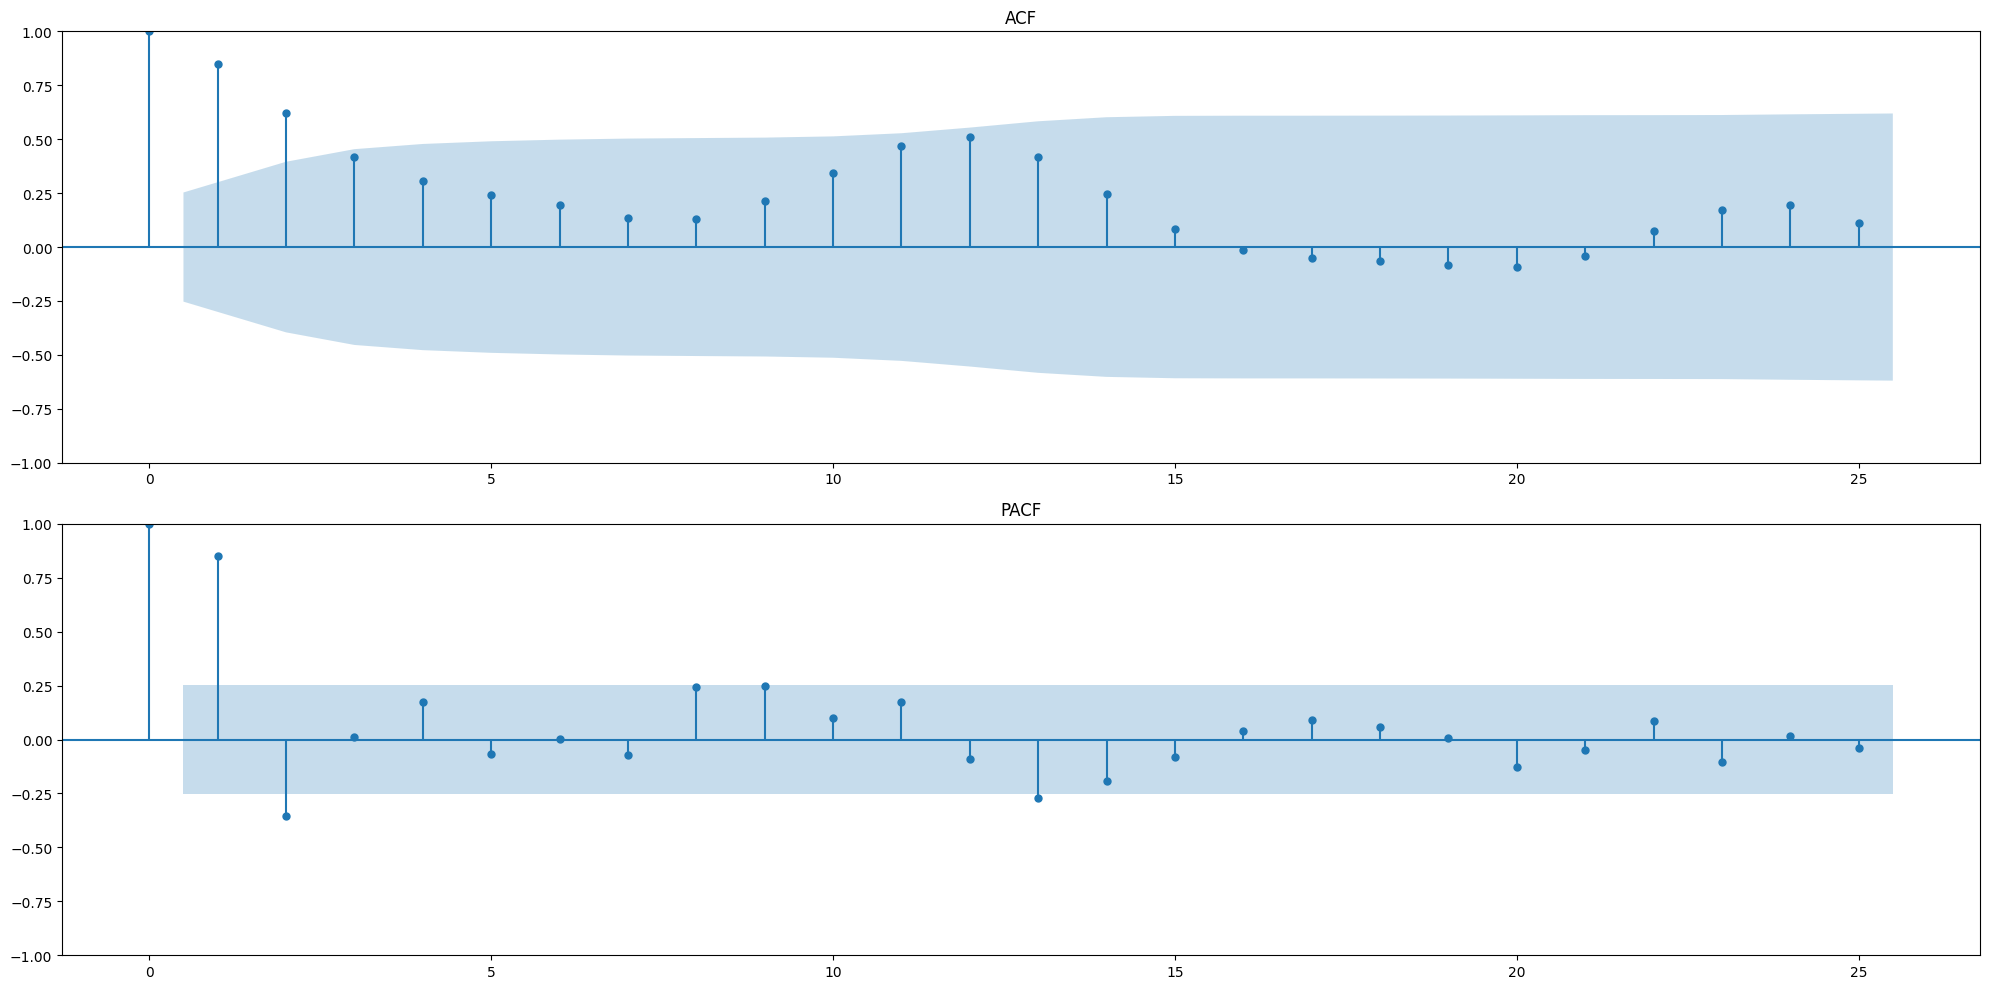

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20, 10))
plt.subplot(211) #2row1col의 1번. plt.subplot(nrows, ncols, plot_number)
plot_acf(df_month['cnt'], lags=25, ax=plt.gca(), title='ACF')

plt.subplot(2,1,2)
plot_pacf(df_month['cnt'], lags=25, ax=plt.gca(), title='PACF')

plt.tight_layout()
plt.show()

중간 정리

* 월별 시계열 데이터는 비정상성
* 증가하는 추세
* 계절성 O

# 일별 그래프 정상성

## ACF & PACF

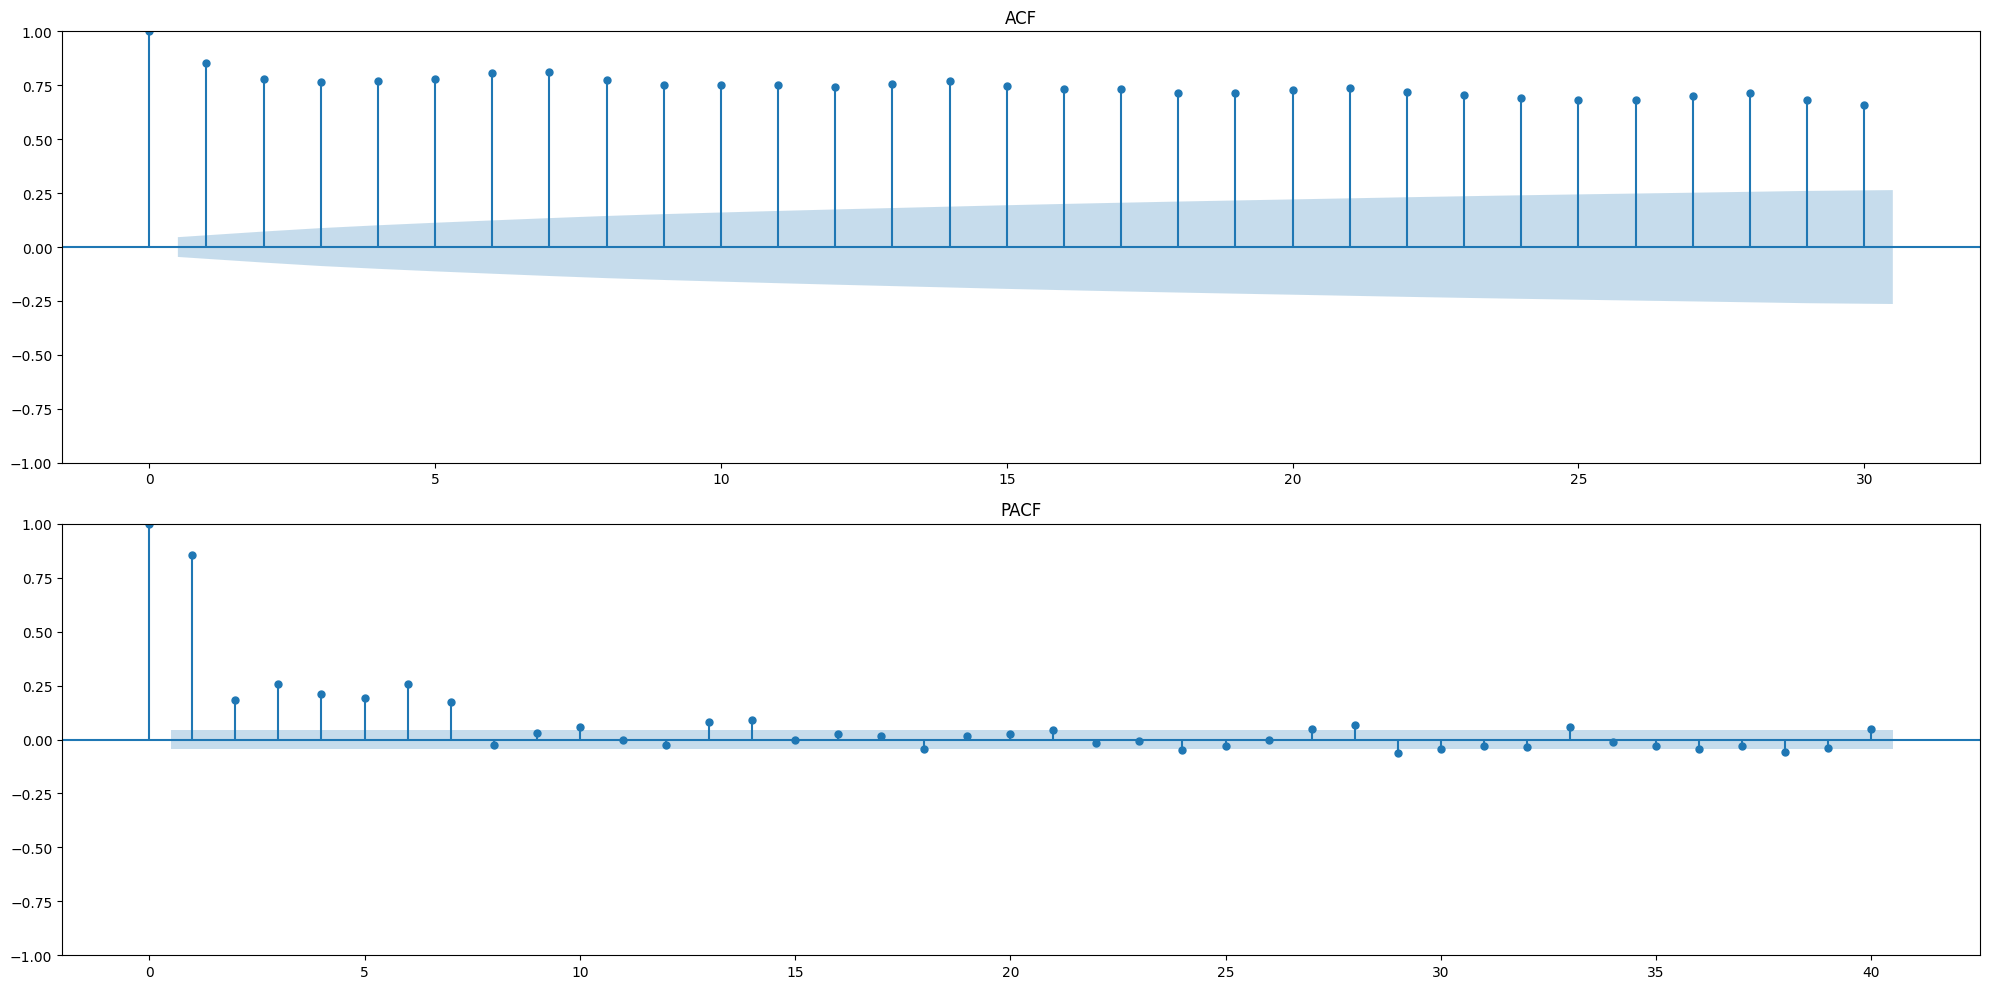

In [18]:
# 일별 그래프 체크.

plt.figure(figsize=(20, 10))
plt.subplot(211)
plot_acf(df['cnt'], lags=30, ax=plt.gca(), title='ACF')

plt.subplot(2,1,2)
plot_pacf(df['cnt'], lags=40, ax=plt.gca(), title='PACF')

plt.tight_layout()
plt.show()

# 일별 그래프 결과
# ACF : 아주 천천히 감소.
# PACF : 특정 9 lag 부터 절단.

## ADF

In [19]:
## ADF

result = adfuller(df['cnt'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
print('ADF Test Result:', 'Stationary' if result[1] <= 0.05 else 'Non-Stationary')


ADF Statistic: -2.529976512891855
p-value: 0.1083500142702914
Critical Values: {'1%': -3.433966009459769, '5%': -2.8631372667825503, '10%': -2.567620331903232}
ADF Test Result: Non-Stationary


In [20]:
cnt_tmp = df['cnt']
cnt_val = cnt_tmp.values #type(cnt_val) == numpy.ndarray
cnt_list = cnt_val.tolist()
cnt_list

[4950,
 7136,
 7156,
 7102,
 7705,
 5681,
 5220,
 6309,
 5988,
 4476,
 4337,
 4401,
 3756,
 4675,
 6993,
 7421,
 6990,
 7054,
 8329,
 6148,
 5574,
 4929,
 4263,
 3370,
 3307,
 3116,
 2833,
 3028,
 4425,
 3591,
 4104,
 5821,
 6557,
 3499,
 2642,
 4213,
 4257,
 5028,
 6114,
 6905,
 4829,
 3047,
 5231,
 6863,
 7477,
 3935,
 3047,
 3494,
 5191,
 8563,
 8899,
 8342,
 8580,
 6408,
 7198,
 7595,
 10712,
 10064,
 4230,
 5761,
 9388,
 16029,
 5373,
 9943,
 14028,
 12925,
 8812,
 13573,
 13324,
 15136,
 15913,
 19514,
 24911,
 7091,
 18415,
 20165,
 11740,
 10297,
 13205,
 8225,
 16420,
 17904,
 14914,
 13942,
 15505,
 17456,
 21232,
 21436,
 24411,
 25673,
 22994,
 28139,
 26817,
 26034,
 2833,
 13297,
 13088,
 7758,
 23925,
 20423,
 25557,
 28885,
 29497,
 8216,
 12721,
 29589,
 28236,
 23499,
 20400,
 28351,
 33144,
 8095,
 1037,
 24560,
 33728,
 32547,
 32989,
 33738,
 35159,
 32629,
 34593,
 8374,
 25963,
 34058,
 37389,
 19809,
 40026,
 33738,
 37851,
 36549,
 33923,
 3551,
 35668,
 35918,

In [21]:
# 계절성을 보이기에 SARIMA 모델을 적용.

from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm

# 예시 데이터 생성 (날짜 형식으로 변환)
# date_range = pd.date_range(start='2018-01-01', end='2022-12-31')
# cnt_data = cnt_list

# data = {'date': date_range, 'cnt': cnt_data}
# df1 = pd.DataFrame(data)

# 파라미터 범위 설정
p = range(0, 3)  # AR(p)
d = range(0, 2)  # 차분 차수
q = range(0, 3)  # MA(q)
P = range(0, 3)  # Seasonal AR(P)
D = range(0, 2)  # Seasonal 차분 차수
Q = range(0, 3)  # Seasonal MA(Q)
s = [12]         # 계절 주기

# 가능한 모든 파라미터 조합 생성
param_combinations = list(product(p, d, q, P, D, Q, s))

best_aic = float("inf")
best_params = None

# 그리드 탐색으로 최적의 파라미터 찾기
with tqdm(total=len(param_combinations)) as pg:
    for param in param_combinations:
        pg.update(1)
        try:
            model = SARIMAX(df['cnt'], order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], param[6]))
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
        except:
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")

 27%|██▋       | 87/324 [06:02<24:45,  6.27s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 45%|████▍     | 145/324 [13:35<52:32, 17.61s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 45%|████▌     | 146/324 [13:36<37:40, 12.70s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 45%|████▌     | 147/324 [13:38<28:25,  9.64s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: User

Best AIC: 41286.688045035306
Best Parameters: (1, 1, 1, 0, 1, 1, 12)


일별 데이터 SARIMA 모델 Best parameters : (1, 1, 1, 0, 1, 1, 12)

* order = (1, 1, 1)

* seasonal_order = (0, 1, 1, 12) 12는 주기.

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMA 모델 생성
model = SARIMAX(df['cnt'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# 모델 학습
model_fit = model.fit()

In [26]:
model_fit.summary()

# # 예측
# predictions = model.predict(start=len(train_data), end=len(data))

# # 평가
# mse = np.mean((predictions - test_data)**2)
# print("MSE:", mse)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                cnt   No. Observations:                 1825
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -20639.344
Date:                            Wed, 30 Aug 2023   AIC                          41286.688
Time:                                    16:18:42   BIC                          41308.697
Sample:                                         0   HQIC                         41294.810
                                           - 1825                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3119      0.016     19.224      0.000       0.280       0.344
ma.L1         -0.8805      0.012    -75.829      0.000      -0.903      -0.858
ma.S.L12      -1.0000      0.016    -60.729      0.000      -1.032      -0.968
sigma2      4.452e+08    3.7e-11    1.2e+19      0.000    4.45e+08    4.45e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.63   Jarque-Bera (JB):              4033.82
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               6.86   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+33. Standard errors may be unstable.
"""

In [30]:
prediction = model_fit.get_forecast(steps = 180).predicted_mean
pred_df = pd.DataFrame(prediction)
pred_df

,predicted_mean
1825,48791.474351
1826,47258.325542
1827,46998.602757
1828,50980.197695
1829,50193.611068
...,...
2000,54080.875516
2001,54202.589879
2002,55278.699806
2003,54570.503713


In [37]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1825 to 2004
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   predicted_mean  180 non-null    float64
dtypes: float64(1)
memory usage: 6.9 KB


In [52]:
predicted_mean_values = pred_df['predicted_mean']

# 새로운 데이터프레임을 생성하고 인덱스를 0부터 시작하도록 조정한다
new_df = pd.DataFrame({'predicted_mean': predicted_mean_values})
new_df.index = range(len(new_df))  # 인덱스를 0부터 시작하도록 변경

# 결과 확인
print(new_df)

     predicted_mean
0      48791.474351
1      47258.325542
2      46998.602757
3      50980.197695
4      50193.611068
..              ...
175    54080.875516
176    54202.589879
177    55278.699806
178    54570.503713
179    54384.737260

[180 rows x 1 columns]


In [53]:
sub1

,대여일시,대여건수
0,2023-01-01,NaN
1,2023-01-02,NaN
2,2023-01-03,NaN
3,2023-01-04,NaN
4,2023-01-05,NaN
...,...,...
175,2023-06-25,NaN
176,2023-06-27,NaN
177,2023-06-28,NaN
178,2023-06-29,NaN


In [54]:
sub1['대여건수'] = new_df['predicted_mean']
sub1

,대여일시,대여건수
0,2023-01-01,48791.474351
1,2023-01-02,47258.325542
2,2023-01-03,46998.602757
3,2023-01-04,50980.197695
4,2023-01-05,50193.611068
...,...,...
175,2023-06-25,54080.875516
176,2023-06-27,54202.589879
177,2023-06-28,55278.699806
178,2023-06-29,54570.503713


In [55]:
sub1.to_excel('sub_pred.xlsx', index = False)